In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pymysql
import seaborn as sns

In [2]:
conn = pymysql.connect(host='localhost', 
                     user='root', 
                     port= 3306,
                     database = 'KYF',
                     charset = 'utf8')
cursor = conn.cursor() # <pymysql.cursors.Cursor at 0x242688ba160>

In [3]:
columns = ['日期','自定義產線ID', '主螺桿溫度1', '主螺桿溫度2', '主螺桿溫度3', '主螺桿溫度4', '主螺桿溫度5', '主螺桿溫度6', '前輪轉數', '中輪轉數', '後輪轉數', '厚度', '線速度', '前輪電流', '中輪電流', '後輪電流', '總電流', '總電壓', '總功率']

# 2020 押出紀錄

## 觀察數據資料

In [4]:
sql = 'SELECT * FROM 押出2020'
cursor.execute(sql)
data = cursor.fetchall() # data type is tuple
df = pd.DataFrame(data)

In [5]:
df.columns = columns

In [6]:
data = df[['日期','主螺桿溫度1', '主螺桿溫度2', '主螺桿溫度3', '主螺桿溫度4', '主螺桿溫度5', '主螺桿溫度6']]

In [7]:
data['平均螺桿溫度'] = (data['主螺桿溫度1']+data['主螺桿溫度2']+data['主螺桿溫度3']+data['主螺桿溫度4']+data['主螺桿溫度5']+data['主螺桿溫度6'])/6

<ipython-input-7-066e1bb84b0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['平均螺桿溫度'] = (data['主螺桿溫度1']+data['主螺桿溫度2']+data['主螺桿溫度3']+data['主螺桿溫度4']+data['主螺桿溫度5']+data['主螺桿溫度6'])/6


In [8]:
data.head()

,日期,主螺桿溫度1,主螺桿溫度2,主螺桿溫度3,主螺桿溫度4,主螺桿溫度5,主螺桿溫度6,平均螺桿溫度
0,2020-01-01 00:00:00,274.0,275.0,273.0,276.0,276.0,277.0,275.166667
1,2020-01-01 00:01:00,277.0,275.0,275.0,274.0,273.0,276.0,275.000000
2,2020-01-01 00:02:00,272.0,275.0,278.0,276.0,277.0,275.0,275.500000
3,2020-01-01 00:03:00,274.0,277.0,277.0,277.0,275.0,275.0,275.833333
4,2020-01-01 00:04:00,273.0,276.0,278.0,275.0,276.0,277.0,275.833333


In [9]:
data['月份'] = data['日期'].dt.month 

<ipython-input-9-a09662e872bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月份'] = data['日期'].dt.month


## 去nan＆0

In [10]:
# data 367377 去nan
data = data.dropna(subset=['主螺桿溫度1', '主螺桿溫度2', '主螺桿溫度3', '主螺桿溫度4', '主螺桿溫度5', '主螺桿溫度6'])
# data 367365 去0
data = data.drop(index = data.平均螺桿溫度[data.平均螺桿溫度 == 0].index)

## 尋找正常/異常溫度範圍

In [11]:
# 平均螺桿溫度欄位平均
data["平均螺桿溫度"].mean()

276.2772329064198

# 每個月暴漲的次數，反證
# 電壓電流
# 比對 每個月異常次數

In [12]:
# 正負4度
plus4 = data["平均螺桿溫度"].mean()+4
print('平均螺桿溫度上4度: ' + str(plus4))

minus4 = data["平均螺桿溫度"].mean()-4
print('平均螺桿溫度下4度: ' + str(minus4))

平均螺桿溫度上4度: 280.2772329064198
平均螺桿溫度下4度: 272.2772329064198


In [13]:
# 正常值範圍
normal = data[data["平均螺桿溫度"].between(minus4, plus4)]
print('正常範圍內最大平均螺桿溫度: '+str(normal['平均螺桿溫度'].max()))
print('正常範圍內最小平均螺桿溫度: '+str(normal['平均螺桿溫度'].min()))

print('\n')

# 異常值範圍
min_abnormal = data[data["平均螺桿溫度"] < minus4]
max_abnormal = data[data["平均螺桿溫度"] > plus4]

# min_abnormal
print('異常值最大螺桿平均溫度: '+str(max_abnormal['平均螺桿溫度'].max()))
# max_abnormal
print('異常值最小螺桿平均溫度: '+str(min_abnormal['平均螺桿溫度'].min()))

正常範圍內最大平均螺桿溫度: 280.1666666666667
正常範圍內最小平均螺桿溫度: 272.3333333333333


異常值最大螺桿平均溫度: 294.1666666666667
異常值最小螺桿平均溫度: 21.5


In [14]:
# 正負3度
plus3 = data["平均螺桿溫度"].mean()+3
print('平均螺桿溫度上4度: ' + str(plus3))

minus3 = data["平均螺桿溫度"].mean()-3
print('平均螺桿溫度下4度: ' + str(minus3))

平均螺桿溫度上4度: 279.2772329064198
平均螺桿溫度下4度: 273.2772329064198


In [15]:
# 正常值範圍
normal = data[data["平均螺桿溫度"].between(minus3, plus3)]
print('正常範圍內最大平均螺桿溫度: '+str(normal['平均螺桿溫度'].max()))
print('正常範圍內最小平均螺桿溫度: '+str(normal['平均螺桿溫度'].min()))

print('\n')

# 異常值範圍
min_abnormal = data[data["平均螺桿溫度"] < minus3]
max_abnormal = data[data["平均螺桿溫度"] > plus3]

# min_abnormal
print('異常值最大螺桿平均溫度: '+str(max_abnormal['平均螺桿溫度'].max()))
# max_abnormal
print('異常值最小螺桿平均溫度: '+str(min_abnormal['平均螺桿溫度'].min()))

正常範圍內最大平均螺桿溫度: 279.1666666666667
正常範圍內最小平均螺桿溫度: 273.3333333333333


異常值最大螺桿平均溫度: 294.1666666666667
異常值最小螺桿平均溫度: 21.5


In [16]:
# 資料總筆數
print('總筆數: ' + str(len(data)))
# 異常值總筆數
print('異常值總筆數: ' + str(len(min_abnormal)+len(max_abnormal)))
# 正常值總筆數
print('正常值總筆數: ' + str(len(normal)))

總筆數: 367365
異常值總筆數: 54453
正常值總筆數: 312912


In [17]:
error = pd.concat([min_abnormal, max_abnormal], ignore_index=True)

In [18]:
error

,日期,主螺桿溫度1,主螺桿溫度2,主螺桿溫度3,主螺桿溫度4,主螺桿溫度5,主螺桿溫度6,平均螺桿溫度,月份
0,2020-01-01 05:35:00,272.0,272.0,276.0,272.0,272.0,274.0,273.000000,1
1,2020-01-01 05:36:00,272.0,272.0,276.0,272.0,272.0,274.0,273.000000,1
2,2020-01-01 05:56:00,273.0,273.0,269.0,273.0,274.0,274.0,272.666667,1
3,2020-01-01 05:59:00,270.0,275.0,273.0,273.0,273.0,275.0,273.166667,1
4,2020-01-01 06:05:00,273.0,273.0,270.0,271.0,274.0,275.0,272.666667,1
...,...,...,...,...,...,...,...,...,...
54448,2020-12-31 18:36:00,285.0,285.0,282.0,286.0,286.0,285.0,284.833333,12
54449,2020-12-31 18:37:00,284.0,282.0,283.0,286.0,284.0,285.0,284.000000,12
54450,2020-12-31 18:38:00,284.0,282.0,283.0,286.0,284.0,285.0,284.000000,12
54451,2020-12-31 18:39:00,287.0,284.0,281.0,284.0,283.0,285.0,284.000000,12


In [19]:
for x in range(1,13):
    print(f'{x}月 ' + str(len(data[data['月份'] == x])) + '筆紀錄')
    print(f'{x}月 ' + str(len(error[error['月份'] == x])) + '筆異常')

1月 26236筆紀錄
1月 583筆異常
2月 0筆紀錄
2月 0筆異常
3月 19154筆紀錄
3月 562筆異常
4月 41634筆紀錄
4月 1262筆異常
5月 44582筆紀錄
5月 1365筆異常
6月 43015筆紀錄
6月 1679筆異常
7月 44202筆紀錄
7月 1438筆異常
8月 10432筆紀錄
8月 284筆異常
9月 11796筆紀錄
9月 388筆異常
10月 41053筆紀錄
10月 1495筆異常
11月 41344筆紀錄
11月 1547筆異常
12月 43917筆紀錄
12月 43850筆異常


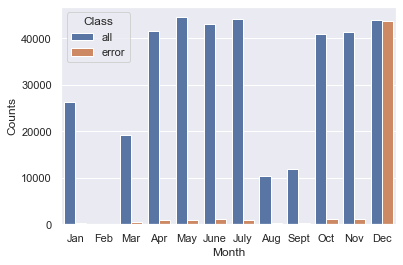

In [20]:
sns.set(style="darkgrid") # darkgrid, whitegrid, dark, white, ticks

degree = pd.DataFrame([
    ['Jan', 'all', 26236],
    ['Jan', 'error', 333],
    ['Feb', 'all', 0],
    ['Feb', 'error', 0],
    ['Mar', 'all', 19154],
    ['Mar', 'error', 392],
    ['Apr', 'all', 41634],
    ['Apr', 'error', 873],
    ['May', 'all', 44582],
    ['May', 'error', 904],
    ['June', 'all', 43015],
    ['June', 'error', 1045],
    ['July', 'all', 44202],
    ['July', 'error', 926],
    ['Aug', 'all', 10432],
    ['Aug', 'error', 180],
    ['Sept','all', 11796],
    ['Sept', 'error', 275],
    ['Oct','all', 41053],
    ['Oct', 'error', 1121],
    ['Nov','all', 41344],
    ['Nov', 'error', 1217],
    ['Dec','all', 43917],
    ['Dec', 'error', 43792],
], columns=['Month', 'Class', 'Counts'])

ax = sns.barplot(x='Month', y='Counts', hue='Class', data=degree)
plt.savefig('pic.png', dpi = 500)

In [21]:
counts = degree['Counts'].tolist()
counts

[26236,
 333,
 0,
 0,
 19154,
 392,
 41634,
 873,
 44582,
 904,
 43015,
 1045,
 44202,
 926,
 10432,
 180,
 11796,
 275,
 41053,
 1121,
 41344,
 1217,
 43917,
 43792]

In [22]:
all_counts = []
error_counts = []
for x in range(len(counts)):
    if x % 2 == 0:
        all_counts.append(counts[x])
    else:
        error_counts.append(counts[x])

## 線速度

In [23]:
speed_data = df[['日期','線速度']] #376057

In [24]:
# 剔除線速度為NAN和0的值
speed_data = speed_data.dropna(subset=['線速度']) # 375753
speed_data = speed_data[speed_data['線速度'] != 0] # 363478

In [25]:
speed_data['月份'] = speed_data['日期'].dt.month

In [26]:
speed_data.tail()

,日期,線速度,月份
375692,2020-12-31 17:54:00,30.02625,12
375693,2020-12-31 17:55:00,30.02625,12
375694,2020-12-31 17:56:00,30.02250,12
375695,2020-12-31 17:57:00,30.02625,12
375696,2020-12-31 17:58:00,0.15375,12


In [27]:
speed_data[['線速度','月份']][speed_data['月份'] == 12]

,線速度,月份
331481,33.25500,12
331482,33.25500,12
331483,33.25500,12
331484,33.25500,12
331485,33.25500,12
...,...,...
375692,30.02625,12
375693,30.02625,12
375694,30.02250,12
375695,30.02625,12


In [28]:
speed_mean_month = []
for x in range(1, 13):
    v = speed_data[['線速度']][data['月份'] == x].mean().values
    speed_mean_month.append(v)

<ipython-input-28-761bc7ae98f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = speed_data[['線速度']][data['月份'] == x].mean().values
<ipython-input-28-761bc7ae98f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = speed_data[['線速度']][data['月份'] == x].mean().values
<ipython-input-28-761bc7ae98f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = speed_data[['線速度']][data['月份'] == x].mean().values
<ipython-input-28-761bc7ae98f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = speed_data[['線速度']][data['月份'] == x].mean().values
<ipython-input-28-761bc7ae98f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = speed_data[['線速度']][data['月份'] == x].mean().values
<ipython-input-28-761bc7ae98f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = speed_data[['線速度']][data['月份'] == x].mean()

In [29]:
speed_mean_month[1] = 0

In [30]:
month = []
for x in range(1,13):
    month.append(x)

In [31]:
speed_mean_month

[array([36.9469927]),
 0,
 array([38.88787537]),
 array([37.70298048]),
 array([39.95311684]),
 array([38.135916]),
 array([36.5417151]),
 array([40.60064338]),
 array([38.81786899]),
 array([38.28083307]),
 array([37.81418521]),
 array([37.20082993])]

In [32]:
month.remove(2)
speed_mean_month.remove(0)

In [33]:
month

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [34]:
speed_mean_month

[array([36.9469927]),
 array([38.88787537]),
 array([37.70298048]),
 array([39.95311684]),
 array([38.135916]),
 array([36.5417151]),
 array([40.60064338]),
 array([38.81786899]),
 array([38.28083307]),
 array([37.81418521]),
 array([37.20082993])]

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36895 missing from curre

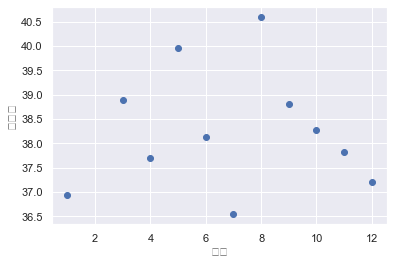

In [35]:
plt.scatter(month, speed_mean_month)
plt.ylabel('線速度')
plt.xlabel('月份')
plt.savefig('v_line.png', dpi = 500)

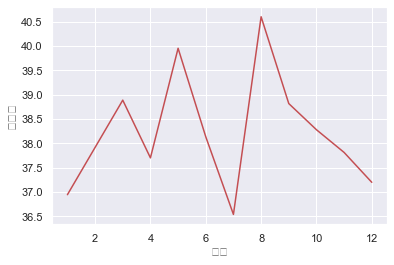

In [36]:
# plt.rcParams['font.family'] = 'Heiti TC'
plt.plot(month, speed_mean_month, 'r')
plt.ylabel('線速度')
plt.xlabel('月份')
plt.savefig('line_chart.png', dpi = 500)

In [37]:
corr_data = df.drop(columns='自定義產線ID')

In [40]:
corr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376058 entries, 0 to 376057
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   日期      376058 non-null  datetime64[ns]
 1   主螺桿溫度1  367377 non-null  float64       
 2   主螺桿溫度2  367377 non-null  float64       
 3   主螺桿溫度3  367377 non-null  float64       
 4   主螺桿溫度4  367377 non-null  float64       
 5   主螺桿溫度5  367377 non-null  float64       
 6   主螺桿溫度6  367377 non-null  float64       
 7   前輪轉數    367377 non-null  object        
 8   中輪轉數    367377 non-null  object        
 9   後輪轉數    367377 non-null  object        
 10  厚度      266547 non-null  float64       
 11  線速度     367377 non-null  object        
 12  前輪電流    367377 non-null  object        
 13  中輪電流    367377 non-null  object        
 14  後輪電流    367377 non-null  object        
 15  總電流     367377 non-null  float64       
 16  總電壓     367377 non-null  float64       
 17  總功率     367377 non-null  floa

In [46]:
corr_data['前輪轉數'] = corr_data['前輪轉數'].astype('float')
corr_data['中輪轉數'] = corr_data['中輪轉數'].astype('float')
corr_data['後輪轉數'] = corr_data['後輪轉數'].astype('float')
corr_data['線速度'] = corr_data['線速度'].astype('float')
corr_data['前輪電流'] = corr_data['前輪電流'].astype('float')
corr_data['中輪電流'] = corr_data['中輪電流'].astype('float')
corr_data['後輪電流'] = corr_data['後輪電流'].astype('float')

In [47]:
corr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376058 entries, 0 to 376057
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   日期      376058 non-null  datetime64[ns]
 1   主螺桿溫度1  367377 non-null  float64       
 2   主螺桿溫度2  367377 non-null  float64       
 3   主螺桿溫度3  367377 non-null  float64       
 4   主螺桿溫度4  367377 non-null  float64       
 5   主螺桿溫度5  367377 non-null  float64       
 6   主螺桿溫度6  367377 non-null  float64       
 7   前輪轉數    367377 non-null  float64       
 8   中輪轉數    367377 non-null  float64       
 9   後輪轉數    367377 non-null  float64       
 10  厚度      266547 non-null  float64       
 11  線速度     367377 non-null  float64       
 12  前輪電流    367377 non-null  float64       
 13  中輪電流    367377 non-null  float64       
 14  後輪電流    367377 non-null  float64       
 15  總電流     367377 non-null  float64       
 16  總電壓     367377 non-null  float64       
 17  總功率     367377 non-null  floa

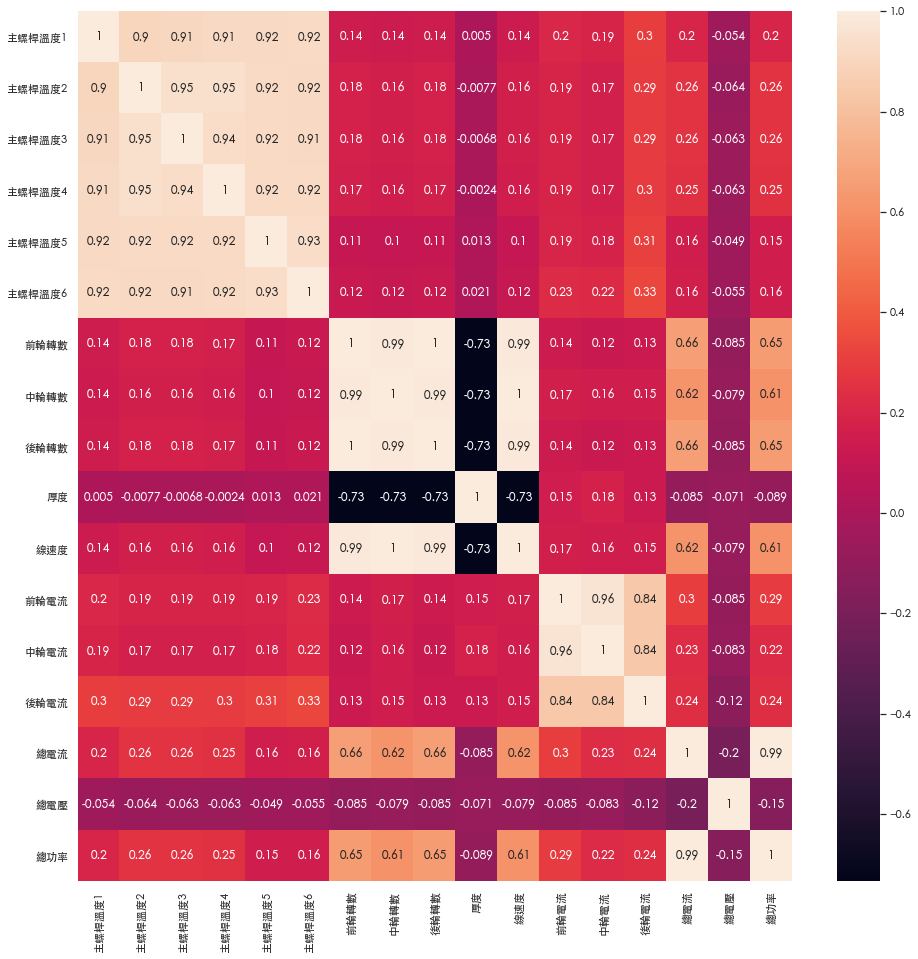

In [50]:
plt.rcParams['font.family'] = 'Heiti TC'
plt.figure(figsize=(16, 16))
correlation= corr_data.corr()
sns.heatmap(correlation,annot=True)
plt.savefig('corr_column.png', dpi = 500)

## 斷開連線

In [48]:
cursor.close()
conn.close()

In [ ]:
# 每個月溫度的異常統計